# Fastai2 AutoEncoder

In [2]:
%matplotlib inline

In [3]:
from fastai2.vision.all import *
from nbdev.showdoc import *

set_seed(2)

In [16]:
path = untar_data(URLs.MNIST); path

Path('/Users/jeremyblythe/.fastai/data/mnist_png')

In [130]:
mnist = DataBlock(blocks = (ImageBlock(cls=PILImageBW),ImageBlock(cls=PILImageBW)),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter(train_name='training', valid_name='testing') )

In [178]:
data = mnist.dataloaders(path)

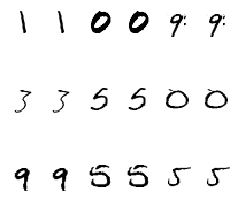

In [179]:
data.show_batch(figsize=(4,4))

In [180]:
d = data.one_batch()[1]

In [181]:
d[0].shape

torch.Size([1, 28, 28])

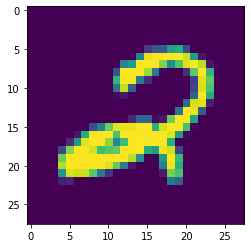

In [182]:
plt.imshow(d[0,0]);

In [158]:
# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        # linear layer (784 -> encoding_dim)
        self.fc1 = nn.Linear(28 * 28, encoding_dim)
        
        ## decoder ##
        # linear layer (encoding_dim -> input size)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
        

    def forward(self, x):
        # just get one channel from the RGB
        #x = x[:,0,:,:]
        #print(x.shape)
        # flatten images
        x = x.view(x.size(0), -1)
        #print(x.shape)
        # add layer, with relu activation function
        x = F.relu(self.fc1(x))
        #print(x.shape)
        # output layer (sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.fc2(x))
        #print(x.shape)
        # reshape to 28x28
        x = x.view(x.size(0), 1, 28, 28)
        #print(x.shape)
        return x

# initialize the NN
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [162]:
class LossFunc(nn.Module):
    def __init__(self):
        super(LossFunc, self).__init__()
        return

    def forward(self, pred, target):
        #print(pred.shape, target.shape)
        return nn.MSELoss()(pred,target)


In [175]:
learn = Learner(data, model, loss_func=nn.MSELoss())# loss_func=LossFunc())

In [185]:
learn = Learner(data, model, loss_func=mse)

In [186]:
learn.fit(1)

epoch,train_loss,valid_loss,time
0,0.018061,0.017369,00:36


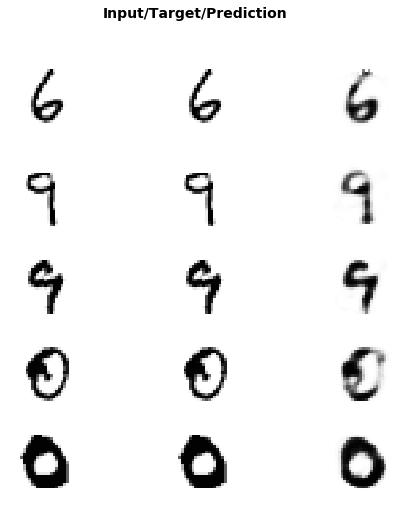

In [187]:
learn.show_results(max_n=6, figsize=(8,8))